In [3]:
import requests
response = requests.get(url='https://store.steampowered.com/appreviews/413150?json=1').json()

In [16]:
# Loading in everything needed
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import cluster
from sklearn import preprocessing
import json
from scipy import stats
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [17]:
# Find reviews of a game from its appid
import requests

def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

In [6]:
# Get extra information for a game from appid
import requests

def get_details(appid, params={'json':1}):
        url = 'https://store.steampowered.com/api/appdetails?appids='
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

In [4]:
get_reviews('10')

{'success': 1,
 'query_summary': {'num_reviews': 20,
  'review_score': 9,
  'review_score_desc': 'Overwhelmingly Positive',
  'total_positive': 25536,
  'total_negative': 883,
  'total_reviews': 26419},
 'reviews': [{'recommendationid': '125051684',
   'author': {'steamid': '76561198832888311',
    'num_games_owned': 52,
    'num_reviews': 15,
    'playtime_forever': 20,
    'playtime_last_two_weeks': 0,
    'playtime_at_review': 16,
    'last_played': 1667747180},
   'language': 'english',
   'review': 'joining a server is like russian roulette',
   'timestamp_created': 1667747128,
   'timestamp_updated': 1667747128,
   'voted_up': True,
   'votes_up': 71,
   'votes_funny': 27,
   'weighted_vote_score': '0.865129530429840088',
   'comment_count': 0,
   'steam_purchase': True,
   'received_for_free': False,
   'written_during_early_access': False,
   'hidden_in_steam_china': True,
   'steam_china_location': ''},
  {'recommendationid': '125311713',
   'author': {'steamid': '765611989736

In [10]:
for keys in get_reviews('10'):
    print(keys)

success
query_summary
reviews
cursor


In [11]:
get_reviews('10')['query_summary']

{'num_reviews': 20,
 'review_score': 9,
 'review_score_desc': 'Overwhelmingly Positive',
 'total_positive': 25563,
 'total_negative': 884,
 'total_reviews': 26447}

In [14]:
for keys in get_reviews('10')['reviews'][0]:
    print(keys)

recommendationid
author
language
review
timestamp_created
timestamp_updated
voted_up
votes_up
votes_funny
weighted_vote_score
comment_count
steam_purchase
received_for_free
written_during_early_access
hidden_in_steam_china
steam_china_location


In [43]:
for keys in get_reviews('10'):
    print(keys)

success
query_summary
reviews
cursor


In [45]:
for keys in get_n_reviews('10'):
    print(keys)

{'recommendationid': '112566004', 'author': {'steamid': '76561198010006564', 'num_games_owned': 792, 'num_reviews': 4, 'playtime_forever': 61328, 'playtime_last_two_weeks': 0, 'playtime_at_review': 61328, 'last_played': 1555095391}, 'language': 'english', 'review': 'Sometimes you will never know the value of a moment until it becomes a memory.', 'timestamp_created': 1647816784, 'timestamp_updated': 1647816784, 'voted_up': True, 'votes_up': 110, 'votes_funny': 2, 'weighted_vote_score': '0.912584066390991211', 'comment_count': 0, 'steam_purchase': False, 'received_for_free': False, 'written_during_early_access': False, 'hidden_in_steam_china': False, 'steam_china_location': ''}
{'recommendationid': '107374038', 'author': {'steamid': '76561198311106723', 'num_games_owned': 92, 'num_reviews': 7, 'playtime_forever': 62290, 'playtime_last_two_weeks': 0, 'playtime_at_review': 4772, 'last_played': 1659697143}, 'language': 'english', 'review': "One of the best games of our childhood. I don't th

In [5]:
import requests

def get_name(appid, params={'json':1}):
        url = 'https://store.steampowered.com/api/appdetails?appids='
        response = requests.get(url=url+appid, params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

In [100]:
for keys in get_name('10')['10']['data']:
    print(keys)

type
name
steam_appid
required_age
is_free
detailed_description
about_the_game
short_description
supported_languages
header_image
website
pc_requirements
mac_requirements
linux_requirements
developers
publishers
price_overview
packages
package_groups
platforms
metacritic
categories
genres
screenshots
recommendations
release_date
support_info
background
background_raw
content_descriptors


In [103]:
get_name('10')['10']['data']['name']

'Counter-Strike'

In [33]:
get_name('10')['10']['data']['metacritic']['score']

88

In [32]:
get_name('10')['10']['data']['price_overview']['final_formatted']

'฿189.00'

In [40]:
get_name('10')['10']['data']['genres']

{'id': '1', 'description': 'Action'}

In [42]:
get_name('10')['10']['data']['release_date']['date']

'1 Nov, 2000'

In [6]:
# Getting n number of reviews for a game from appid
def get_n_reviews(appid, n=1000):
    reviews = []
    cursor = '*'
    params = {
            'json' : 1,
            'filter' : 'all',
            'language' : 'english',
            'day_range' : 365,
            'review_type' : 'all',
            'purchase_type' : 'all'
            }

    while n > 0:
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [6]:
9223372036854775807

9223372036854775807

In [7]:
get_n_reviews('10')

[{'recommendationid': '112566004',
  'author': {'steamid': '76561198010006564',
   'num_games_owned': 792,
   'num_reviews': 4,
   'playtime_forever': 61328,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 61328,
   'last_played': 1555095391},
  'language': 'english',
  'review': 'Sometimes you will never know the value of a moment until it becomes a memory.',
  'timestamp_created': 1647816784,
  'timestamp_updated': 1647816784,
  'voted_up': True,
  'votes_up': 110,
  'votes_funny': 2,
  'weighted_vote_score': '0.912584066390991211',
  'comment_count': 0,
  'steam_purchase': False,
  'received_for_free': False,
  'written_during_early_access': False,
  'hidden_in_steam_china': False,
  'steam_china_location': ''},
 {'recommendationid': '107374038',
  'author': {'steamid': '76561198311106723',
   'num_games_owned': 92,
   'num_reviews': 7,
   'playtime_forever': 62290,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 4772,
   'last_played': 1659697143},
  'language':

In [8]:
len(get_n_reviews('10'))

689

In [9]:
for key in get_reviews('10'):
    print(key)
get_reviews('10')['query_summary']

success
query_summary
reviews
cursor


{'num_reviews': 20,
 'review_score': 9,
 'review_score_desc': 'Overwhelmingly Positive',
 'total_positive': 25536,
 'total_negative': 883,
 'total_reviews': 26419}

In [10]:
df1 = pd.DataFrame(get_n_reviews('10'))
df1

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,112566004,"{'steamid': '76561198010006564', 'num_games_ow...",english,Sometimes you will never know the value of a m...,1647816784,1647816784,True,110,2,0.912584066390991211,0,False,False,False,False,
1,107374038,"{'steamid': '76561198311106723', 'num_games_ow...",english,One of the best games of our childhood. I don'...,1641388133,1641388133,True,135,8,0.902691423892974854,0,True,False,False,False,
2,120434291,"{'steamid': '76561198385068308', 'num_games_ow...",english,Players who's still play this game:\n⣿⣿⣿⣿⣿⣿⣿⣿⡿...,1660209679,1660209679,True,105,26,0.88371509313583374,0,True,False,False,False,
3,116355590,"{'steamid': '76561198973963706', 'num_games_ow...",english,people who still play this game\n⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠛⠛⠛...,1654127826,1654127826,True,116,30,0.869272410869598389,3,True,False,False,False,
4,125051684,"{'steamid': '76561198832888311', 'num_games_ow...",english,joining a server is like russian roulette,1667747128,1667747128,True,71,27,0.865129530429840088,0,True,False,False,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,106646944,"{'steamid': '76561199124150046', 'num_games_ow...",english,This game will never die.,1640598491,1640598491,True,1,0,0.5,0,True,False,False,False,
685,106308620,"{'steamid': '76561198835873246', 'num_games_ow...",english,simplesmente o melhor FPS DO BRASIL BRASILEIRO,1640203067,1640203067,True,1,0,0.5,0,True,False,False,False,
686,106006631,"{'steamid': '76561199055483317', 'num_games_ow...",english,boring,1639790016,1639790016,True,1,1,0.5,0,True,False,False,False,
687,105441574,"{'steamid': '76561198095459184', 'num_games_ow...",english,Best damn shooter out there! Enjoy this with y...,1638931003,1638931003,True,1,0,0.5,0,True,False,False,False,


In [11]:
df1['weighted_vote_score']

0      0.912584066390991211
1      0.902691423892974854
2       0.88371509313583374
3      0.869272410869598389
4      0.865129530429840088
               ...         
684                     0.5
685                     0.5
686                     0.5
687                     0.5
688                     0.5
Name: weighted_vote_score, Length: 689, dtype: object

NameError: name 'df1' is not defined

In [13]:
x1 = []
for i in df1['timestamp_updated']:
    x1.append(datetime.fromtimestamp(i).month)
    
y1 = []
for i in df1['weighted_vote_score']:
    y1.append(round(float(i), 2))

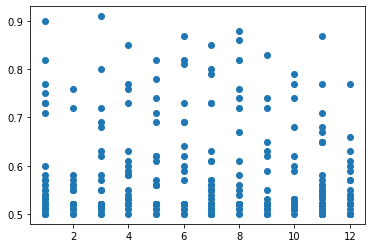

In [14]:
plt.scatter(x1, y1)
plt.show()

In [15]:
df1['timestamp_updated'].min()

1638240247

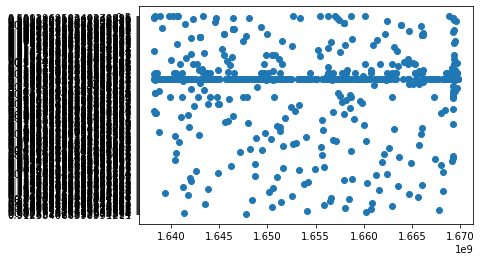

In [16]:
#Seeing the plot from weighted_vote_score and timestamp when the review was updated
y = df1['weighted_vote_score']
x = df1['timestamp_updated']

plt.scatter(x, y)

In [17]:
df1['weighted_vote_score'].min()

'0.5'

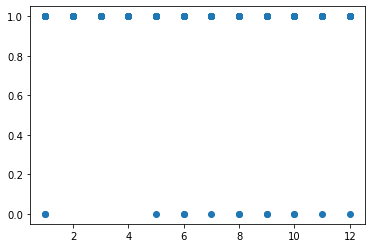

In [18]:
# Plotting votes against months
plt.scatter(x1, df1['voted_up'])
plt.show()

In [19]:
months = []
for i in x1:
    if i not in months:
        months.append(i)

In [20]:
month1 = []
for i in range(len(y1)):
    if x1[i] == 1:
        month1.append(df1['voted_up'].iloc[i])

In [21]:
sum(month1)

61

In [22]:
len(month1)

63

In [23]:
sum(month1)/len(month1)

0.9682539682539683

In [7]:
from bs4 import BeautifulSoup
def get_app_id(game_name):
    response = requests.get(url=f'https://store.steampowered.com/search/?term={game_name}&category1=998', headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'html.parser')
    app_id = soup.find(class_='search_result_row')['data-ds-appid']
    return app_id

In [36]:
def get_n_appids(n=5, filter_by=''):
    appids = []
    url = f'https://store.steampowered.com/search/?category1=998&filter={filter_by}&page='
    page = 0

    while page*25 < n:
        page += 1
        response = requests.get(url=url+str(page), headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text, 'html.parser')
        for row in soup.find_all(class_='search_result_row'):
            appids.append(row['data-ds-appid'])

    return appids[:n]

In [64]:
def get_n_appids(n=5, filter_by='topsellers'):
    appids = []
    url = f'https://store.steampowered.com/search/?category1=998&filter={filter_by}&page=7'
    page = 0

    while page*25 < n:
        page += 1
        response = requests.get(url=url+str(page), headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text, 'html.parser')
        for row in soup.find_all(class_='search_result_row'):
            appids.append(row['data-ds-appid'])

    return appids[:n]

In [53]:
# Getting a number of appids from a steam page
def get_n_appids(n=10, filter_by=''):
    appids = []
    url = f'https://store.steampowered.com/search/?sort_by=Reviews_DESC&category1=998&supportedlang=english&page=2&ndl=1'
    page = 0

    while page*25 < n:
        page += 1
        response = requests.get(url=url+str(page), headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text, 'html.parser')
        for row in soup.find_all(class_='search_result_row'):
            appids.append(row['data-ds-appid'])

    return appids[:n]

In [54]:
gamelist = get_n_appids()
gamelist

['294100',
 '400',
 '508440',
 '546560',
 '460950',
 '1150690',
 '1229490',
 '253230',
 '1089980',
 '420530']

In [ ]:
df.iloc[0]['timestamp_updated']

In [ ]:
datetime.fromtimestamp(df.iloc[0]['timestamp_updated']).month

In [ ]:
month1 = []
for i in range(len(y1)):
    if x1[i] == 1:
        month1.append(df1['voted_up'].iloc[i])

In [ ]:
month1 = []
month2 = []
month3 = []
month4 = []
month5 = []
month6 = []
month7 = []
month8 = []
month9 = []
month10 = []
month11 = []

for i in range(len(df)):
    if datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 1:
        month1.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 2:
        month2.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 3:
        month3.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 4:
        month4.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 5:
        month5.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 6:
        month6.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 7:
        month7.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 8:
        month8.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 9:
        month9.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 10:
        month10.append(df.iloc[i]['voted_up'])
    elif datetime.fromtimestamp(df.iloc[i]['timestamp_updated']).month == 11:
        month11.append(df.iloc[i]['voted_up'])

In [ ]:
Y = [sum(month1)/len(month1), sum(month2)/len(month2), sum(month3)/len(month3), sum(month4)/len(month4), sum(month5)/len(month5), sum(month6)/len(month6), sum(month7)/len(month7), sum(month8)/len(month8), sum(month9)/len(month9), sum(month10)/len(month10), sum(month11)/len(month11)]

In [ ]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
plt.scatter(X, Y)

In [77]:
get_reviews('10')['query_summary']['total_positive']

25538

In [16]:
slope, intercept, r, p, std_err = stats.linregress(X, Y)

NameError: name 'x' is not defined

In [17]:
def myfunc(X):
  return slope * X + intercept

RimWorld: Standard Deviation is 0.021995975057838124
R value is -0.37576717125949
Portal: Standard Deviation is 0.009773459915207033
R value is 0.12509502236213724
Totally Accurate Battle Simulator: Standard Deviation is 0.010332191135508116
R value is 0.20469333216725458
Half-Life: Alyx: Standard Deviation is 0.008746711117537954
R value is -0.05390136832797368
Katana ZERO: Standard Deviation is 0.006836696546647294
R value is 0.2913209645654341
OMORI: Standard Deviation is 0.01911020729726006
R value is 0.01509744772734305
ULTRAKILL: Standard Deviation is 0.04668464418692954
R value is -0.7032861609829069
A Hat in Time: Standard Deviation is 0.0046026994530666415
R value is 0.48038446141526153
The Henry Stickmin Collection: Standard Deviation is 0.009721490374747186
R value is -0.06812132275394339
OneShot: Standard Deviation is 0.011648857890127937
R value is -0.08292755984406193


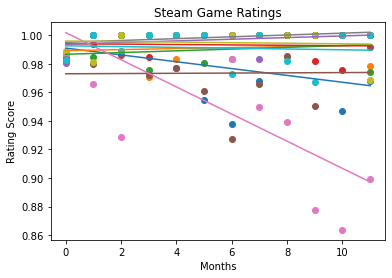

In [19]:
# Getting the linear regression for 10 game reviews over 11 months and 0, which stands for overall ratings 
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in gamelist:
    df = pd.DataFrame(get_n_reviews(i))
    month0 = [get_reviews(i)['query_summary']['total_positive']/get_reviews(i)['query_summary']['total_reviews']]
    month1 = []
    month2 = []
    month3 = []
    month4 = []
    month5 = []
    month6 = []
    month7 = []
    month8 = []
    month9 = []
    month10 = []
    month11 = []

    for j in range(len(df)):
        if datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 1:
            month1.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 2:
            month2.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 3:
            month3.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 4:
            month4.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 5:
            month5.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 6:
            month6.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 7:
            month7.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 8:
            month8.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 9:
            month9.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 10:
            month10.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 11:
            month11.append(df.iloc[j]['voted_up'])
    
    Y = [sum(month0)/len(month0), sum(month1)/len(month1), sum(month2)/len(month2), sum(month3)/len(month3), sum(month4)/len(month4), sum(month5)/len(month5), sum(month6)/len(month6), sum(month7)/len(month7), sum(month8)/len(month8), sum(month9)/len(month9), sum(month10)/len(month10), sum(month11)/len(month11)]
    slope, intercept, r, p, std_err = stats.linregress(X, Y)
    mymodel = list(map(myfunc, x))
    print(get_name(i)[i]['data']['name']+": Standard Deviation is", np.std(Y))
    print('R value is', r)
    plt.scatter(X, Y)
    plt.plot(X, mymodel)

plt.title("Steam Game Ratings")
plt.xlabel("Months")
plt.ylabel("Rating Score")
plt.show()


RimWorld: Standard Deviation is 0.021995975057838124
R value is 0.16619576695628713
Portal: Standard Deviation is 0.009773459915207033
R value is 0.2757294803480994
Totally Accurate Battle Simulator: Standard Deviation is 0.010332191135508116
R value is 0.2473734843800448
Half-Life: Alyx: Standard Deviation is 0.008746711117537954
R value is 0.24901355175243234
Katana ZERO: Standard Deviation is 0.006836696546647294
R value is 0.4617354473718882
OMORI: Standard Deviation is 0.01911020729726006
R value is 0.41535015491428984
ULTRAKILL: Standard Deviation is 0.04668464418692954
R value is 0.6894539163759429
A Hat in Time: Standard Deviation is 0.0046026994530666415
R value is 0.736263736263741
The Henry Stickmin Collection: Standard Deviation is 0.009721490374747186
R value is 0.6660264409550609
OneShot: Standard Deviation is 0.011648857890127937
R value is 0.34402168841983316


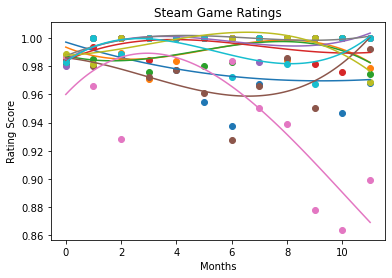

In [25]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in gamelist:
    df = pd.DataFrame(get_n_reviews(i))
    month0 = [get_reviews(i)['query_summary']['total_positive']/get_reviews(i)['query_summary']['total_reviews']]
    month1 = []
    month2 = []
    month3 = []
    month4 = []
    month5 = []
    month6 = []
    month7 = []
    month8 = []
    month9 = []
    month10 = []
    month11 = []

    for j in range(len(df)):
        if datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 1:
            month1.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 2:
            month2.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 3:
            month3.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 4:
            month4.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 5:
            month5.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 6:
            month6.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 7:
            month7.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 8:
            month8.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 9:
            month9.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 10:
            month10.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 11:
            month11.append(df.iloc[j]['voted_up'])
    
    Y = [sum(month0)/len(month0), sum(month1)/len(month1), sum(month2)/len(month2), sum(month3)/len(month3), sum(month4)/len(month4), sum(month5)/len(month5), sum(month6)/len(month6), sum(month7)/len(month7), sum(month8)/len(month8), sum(month9)/len(month9), sum(month10)/len(month10), sum(month11)/len(month11)]
    mymodel = np.poly1d(np.polyfit(X, Y, 3))
    myline = np.linspace(0, 11, 100)
    print(get_name(i)[i]['data']['name']+": Standard Deviation is", np.std(Y))
    print('R value is', r2_score(Y, mymodel(X)))
    plt.scatter(X, Y)
    plt.plot(myline, mymodel(myline))

plt.title("Steam Game Ratings")
plt.xlabel("Months")
plt.ylabel("Rating Score")
plt.show()

RimWorld: Change in review score 0.014515468754791594
Portal: Change in review score 0.008376239872794788
Totally Accurate Battle Simulator: Change in review score 0.007286465573189127
Half-Life: Alyx: Change in review score -0.015835499881824644
Katana ZERO: Change in review score -0.01961971660409345
OMORI: Change in review score -0.008703833416917717
ULTRAKILL: Change in review score 0.0880872936631878
A Hat in Time: Change in review score -0.016653193209377526
The Henry Stickmin Collection: Change in review score 0.0201407243743289
OneShot: Change in review score -0.0172690763052209


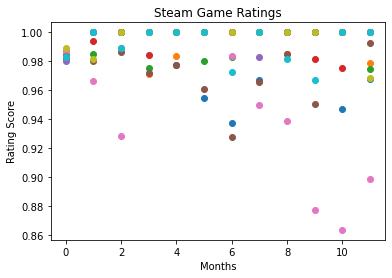

In [55]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for i in gamelist:
    df = pd.DataFrame(get_n_reviews(i))
    month0 = [get_reviews(i)['query_summary']['total_positive']/get_reviews(i)['query_summary']['total_reviews']]
    month1 = []
    month2 = []
    month3 = []
    month4 = []
    month5 = []
    month6 = []
    month7 = []
    month8 = []
    month9 = []
    month10 = []
    month11 = []

    for j in range(len(df)):
        if datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 1:
            month1.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 2:
            month2.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 3:
            month3.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 4:
            month4.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 5:
            month5.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 6:
            month6.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 7:
            month7.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 8:
            month8.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 9:
            month9.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 10:
            month10.append(df.iloc[j]['voted_up'])
        elif datetime.fromtimestamp(df.iloc[j]['timestamp_updated']).month == 11:
            month11.append(df.iloc[j]['voted_up'])
    
    Y = [sum(month0)/len(month0), sum(month1)/len(month1), sum(month2)/len(month2), sum(month3)/len(month3), sum(month4)/len(month4), sum(month5)/len(month5), sum(month6)/len(month6), sum(month7)/len(month7), sum(month8)/len(month8), sum(month9)/len(month9), sum(month10)/len(month10), sum(month11)/len(month11)]
    print(get_name(i)[i]['data']['name']+": Change in review score", Y[0]-Y[-1])
    plt.scatter(X, Y)

plt.title("Steam Game Ratings")
plt.xlabel("Months")
plt.ylabel("Rating Score")
plt.show()

R value is -0.10786856555781728


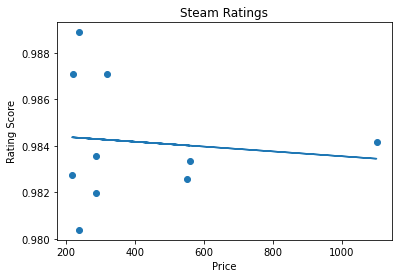

In [65]:
# Plotting ratings score against price of the game
# Linear regression 
X = []
Y = []
for i in gamelist:
    X.append(get_details(i)[i]['data']['price_overview']['final']/100)
    Y.append(get_reviews(i)['query_summary']['total_positive'] / get_reviews(i)['query_summary']['total_reviews'])
XS, YS = zip(*sorted(zip(X, Y)))
plt.scatter(XS, YS)
slope, intercept, r, p, std_err = stats.linregress(X, Y)
mymodel = list(map(myfunc, X))
print('R value is', r)
plt.plot(X, mymodel)
plt.title("Steam Ratings")
plt.xlabel("Price")
plt.ylabel("Rating Score")
plt.show()

In [62]:
for i in gamelist:
    print(get_details(i)[i]['data']['price_overview']['final_formatted'])

฿550.00
฿220.00
฿289.00
฿1,100.00
฿239.00
฿289.00
฿319.00
฿559.00
฿239.00
฿219.00


R value is 0.05425321899096924


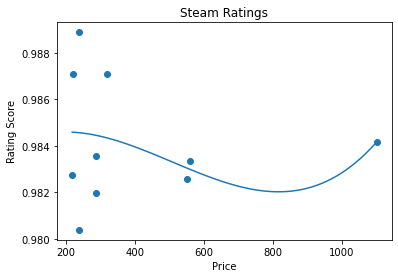

In [72]:
X = []
Y = []
for i in gamelist:
    X.append(get_details(i)[i]['data']['price_overview']['final']/100)
    Y.append(get_reviews(i)['query_summary']['total_positive'] / get_reviews(i)['query_summary']['total_reviews'])
XS, YS = zip(*sorted(zip(X, Y)))
plt.scatter(XS, YS)
mymodel = np.poly1d(np.polyfit(X, Y, 3))
myline = np.linspace(np.min(X), np.max(X), 100)
print('R value is', r2_score(Y, mymodel(X)))
plt.plot(myline, mymodel(myline))
plt.title("Steam Ratings")
plt.xlabel("Price")
plt.ylabel("Rating Score")
plt.show()

In [69]:
np.max(X)

1100.0